In [1]:
import os

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth


In [2]:
from src.pipeline.paprocessing.run import PAProcessingPipeline

In [3]:
from src.pipeline.paprocessing.prompt_manager import PromptManager
from src.pipeline.paprocessing.run import PAProcessingPipeline
pa_pipeline = PAProcessingPipeline()

2024-11-01 20:11:49,302 - micro - MainProcess - INFO     Container 'pre-auth-policies' already exists. (blob_helper.py:_create_container_if_not_exists:73)
C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\src\cosmosdb\cosmosmongodb_helper.py:27: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  self.client = pymongo.MongoClient(connection_string)


Template directory resolved to: C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\src\pipeline\paprocessing\templates
Templates found: ['ner_system_prompt.jinja', 'ner_user_prompt.jinja', 'prior_auth_system_prompt.jinja', 'prior_auth_user_prompt.jinja', 'query_expansion_system_prompt.jinja', 'query_expansion_user_prompt.jinja']


In [4]:
pipeline = PAProcessingPipeline()

2024-11-01 20:11:51,376 - micro - MainProcess - INFO     Container 'pre-auth-policies' already exists. (blob_helper.py:_create_container_if_not_exists:73)


Template directory resolved to: C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\src\pipeline\paprocessing\templates
Templates found: ['ner_system_prompt.jinja', 'ner_user_prompt.jinja', 'prior_auth_system_prompt.jinja', 'prior_auth_user_prompt.jinja', 'query_expansion_system_prompt.jinja', 'query_expansion_user_prompt.jinja']


In [5]:
uploaded_files = r"C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\003\b"
from src.pipeline.paprocessing.helpers import find_all_files
files = find_all_files(uploaded_files, ["pdf"])

2024-11-01 20:11:52,184 - micro - MainProcess - INFO     Found 3 files with extensions ['pdf'] (helpers.py:find_all_files:32)


In [6]:
await pipeline.run(uploaded_files=files)

2024-11-01 20:11:52,411 - micro - MainProcess - INFO     File 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\003\b\doctor_notes\003_b (note).pdf' uploaded to blob 'pa_proccesing_runs/6dda1948/raw_uploaded_files/003_b (note).pdf' successfully. (blob_helper.py:_upload_single_file:175)
2024-11-01 20:11:52,412 - micro - MainProcess - INFO     Uploaded file 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\003\b\doctor_notes\003_b (note).pdf' to blob 'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/6dda1948/raw_uploaded_files/003_b (note).pdf' in container 'pre-auth-policies'. (run.py:upload_files_to_blob:206)
2024-11-01 20:11:52,527 - micro - MainProcess - INFO     File 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\003\b\labs\003_b (labs).pdf' uploaded to blob 'pa_proccesing_runs/6dda1948/raw_uploaded_files/003_b (labs).pdf' successfully. (blob_helper.py:_upload_single_fi

[[{'role': 'system',
   'content': '## Role:\nYou are an expert Prior Authorization (PA) specialist with extensive experience in analyzing medical documents and extracting critical clinical information.\n\n## Task:\nYour task is to review and interpret medical documents provided as images, such as prior authorization forms, medical imaging results, lab reports, and doctor notes. Your goal is to extract essential information to make informed decisions regarding Prior Authorization (PA) workflows. You are proficient in handling images from PDFs and ensuring the accuracy and completeness of the extracted data.\n\n## Instructions:\nCarefully analyze the provided images and extract the following information, presenting it in **JSON format** as key-value pairs:\n\n1. **Diagnosis**\n2. **ICD-10 code**\n3. **Detailed History of Prior Treatments and Results**\n4. **Specific drugs already taken by patient and if the patient failed these prior treatments**\n5. **How many and which alternative dru
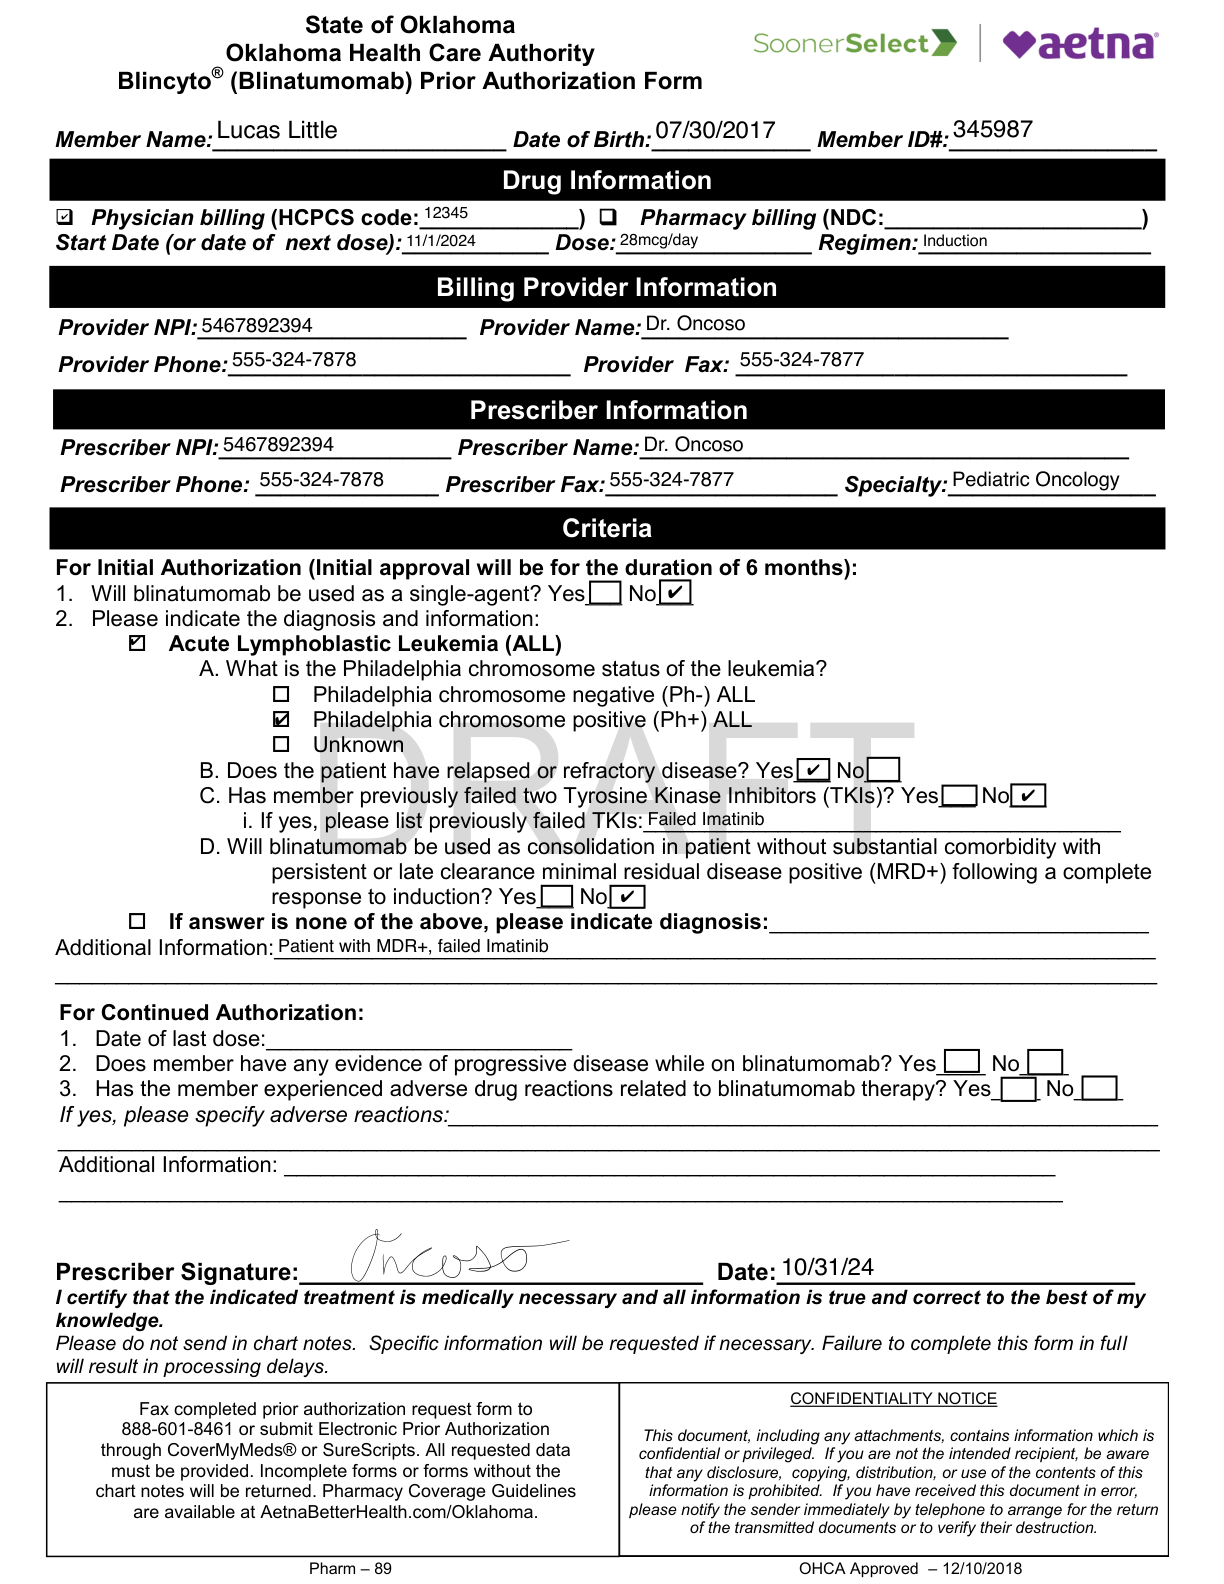
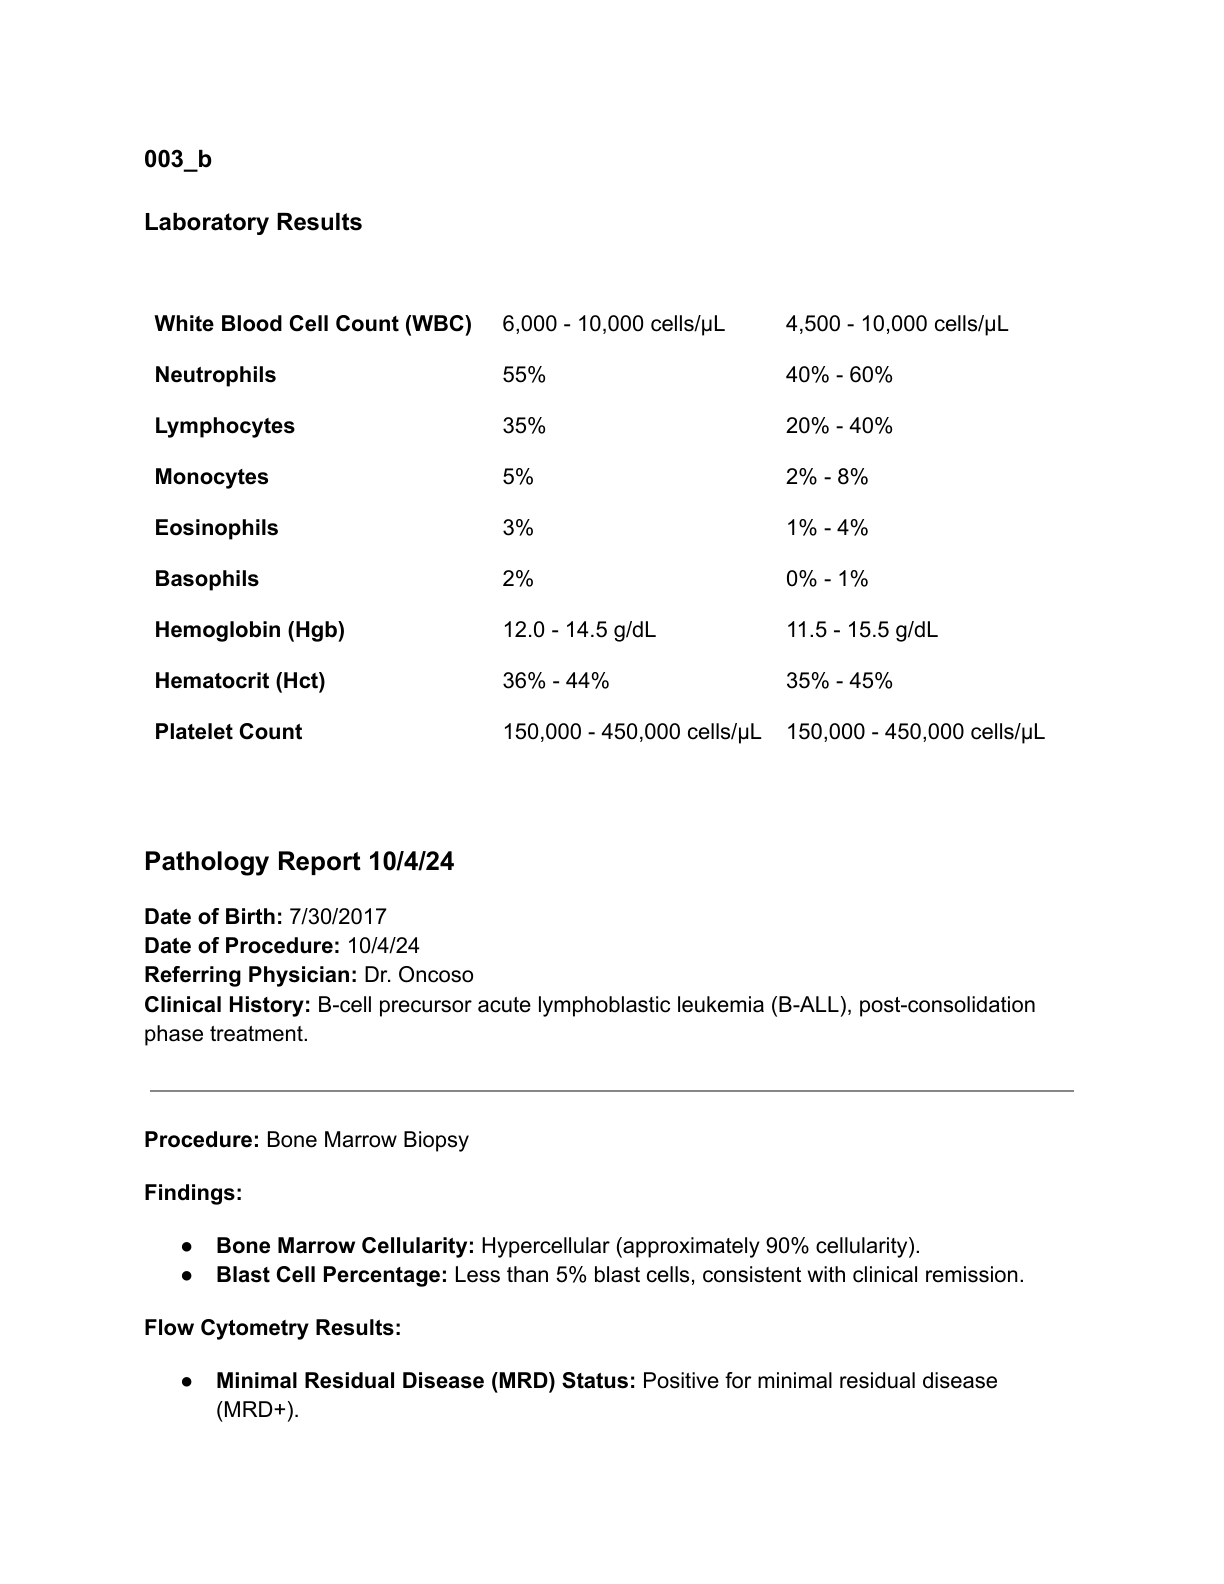
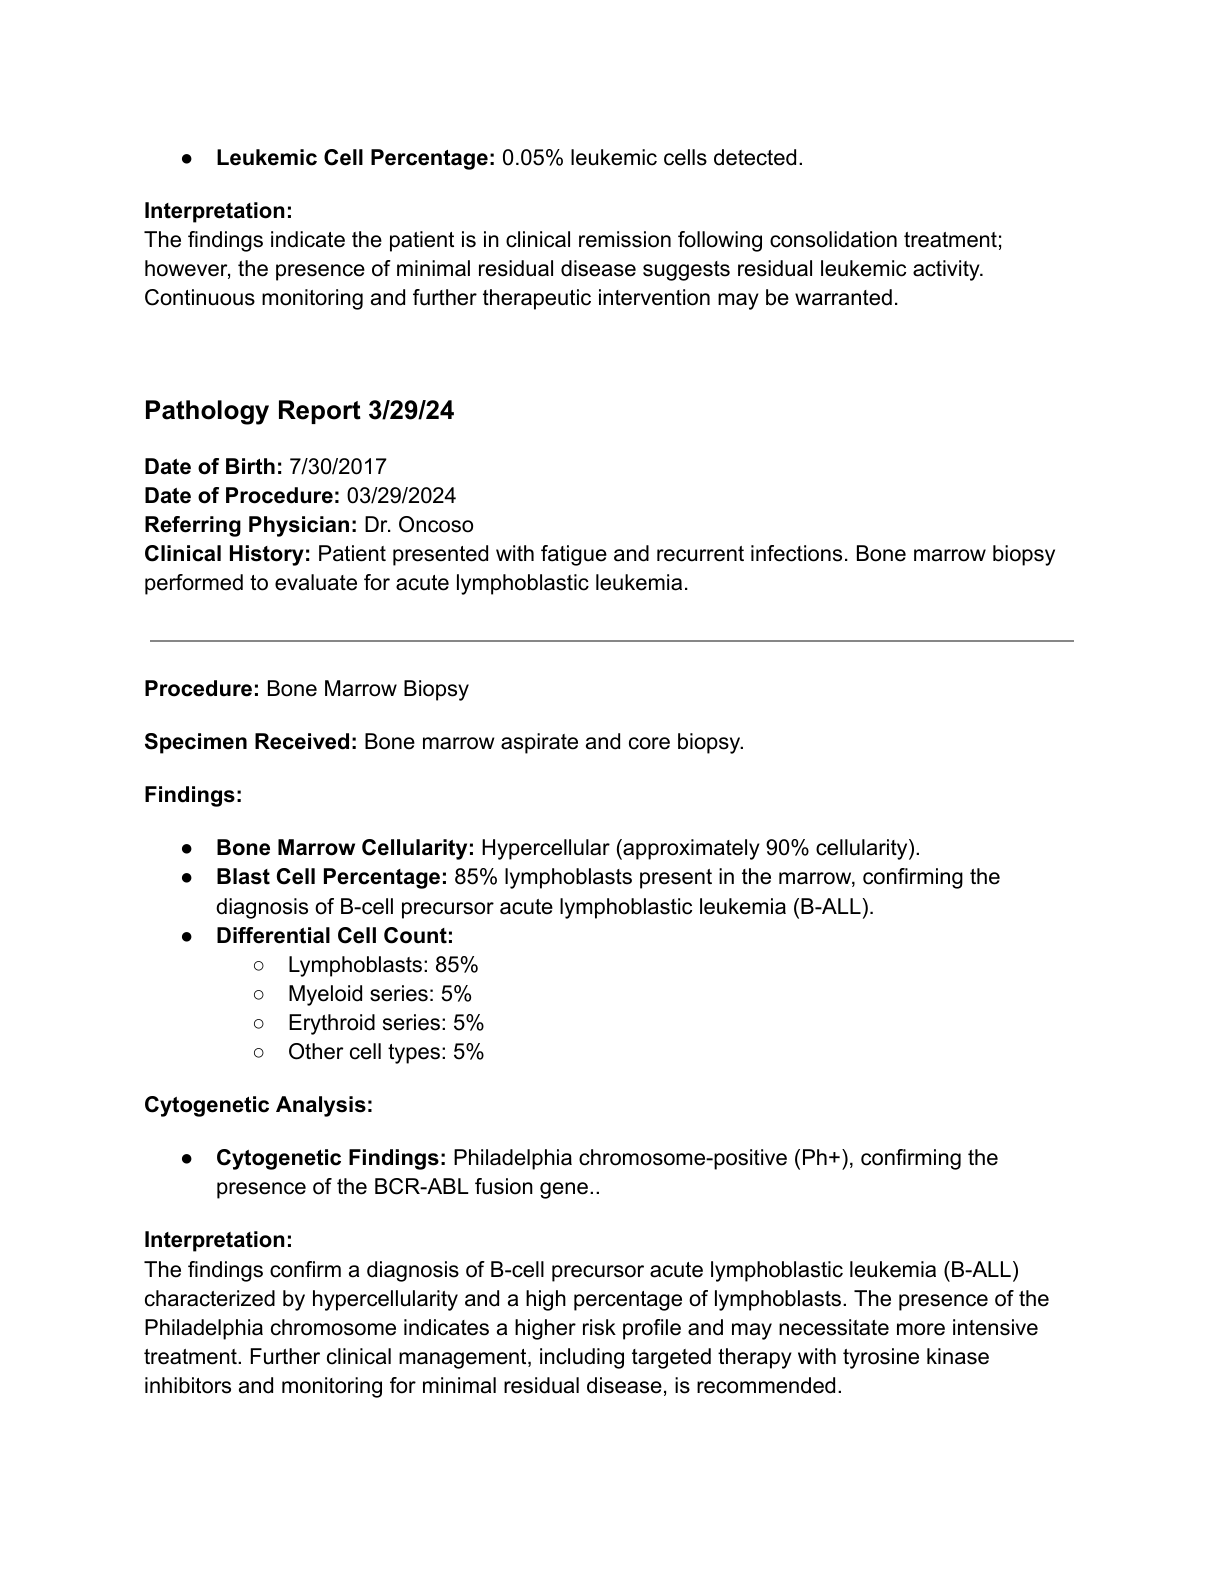
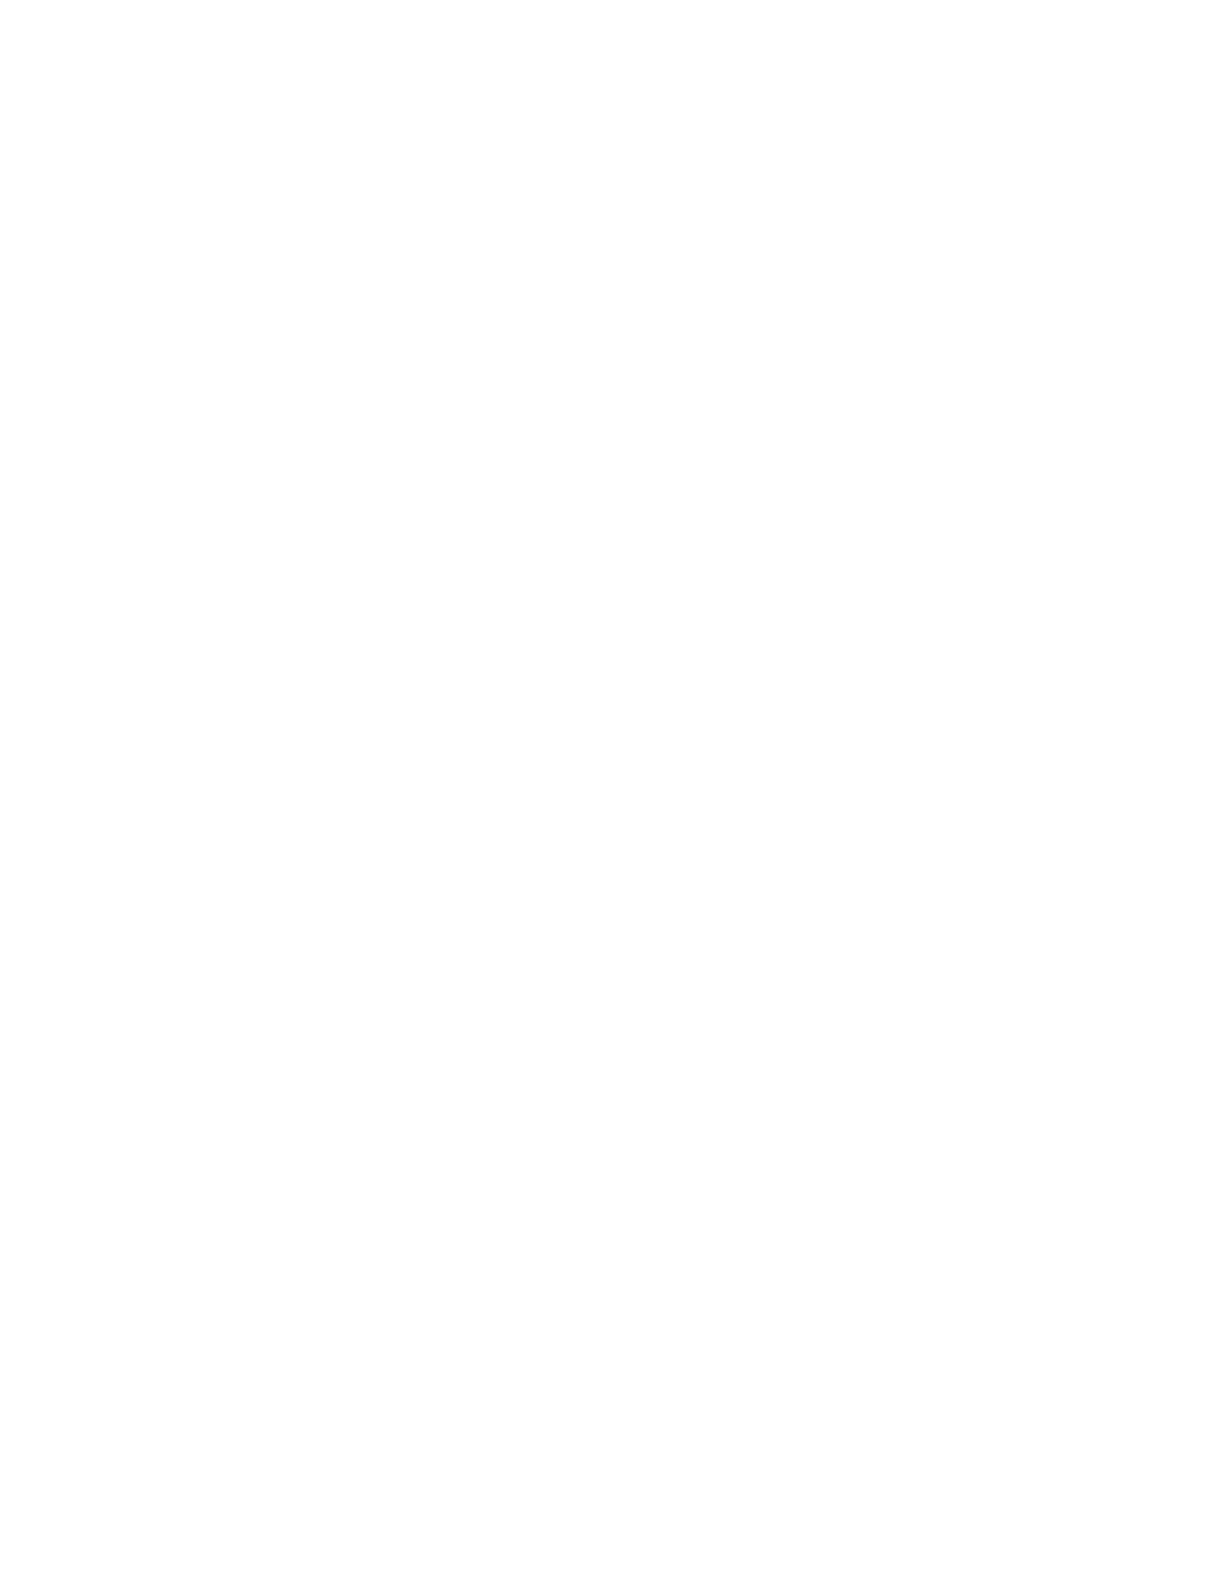
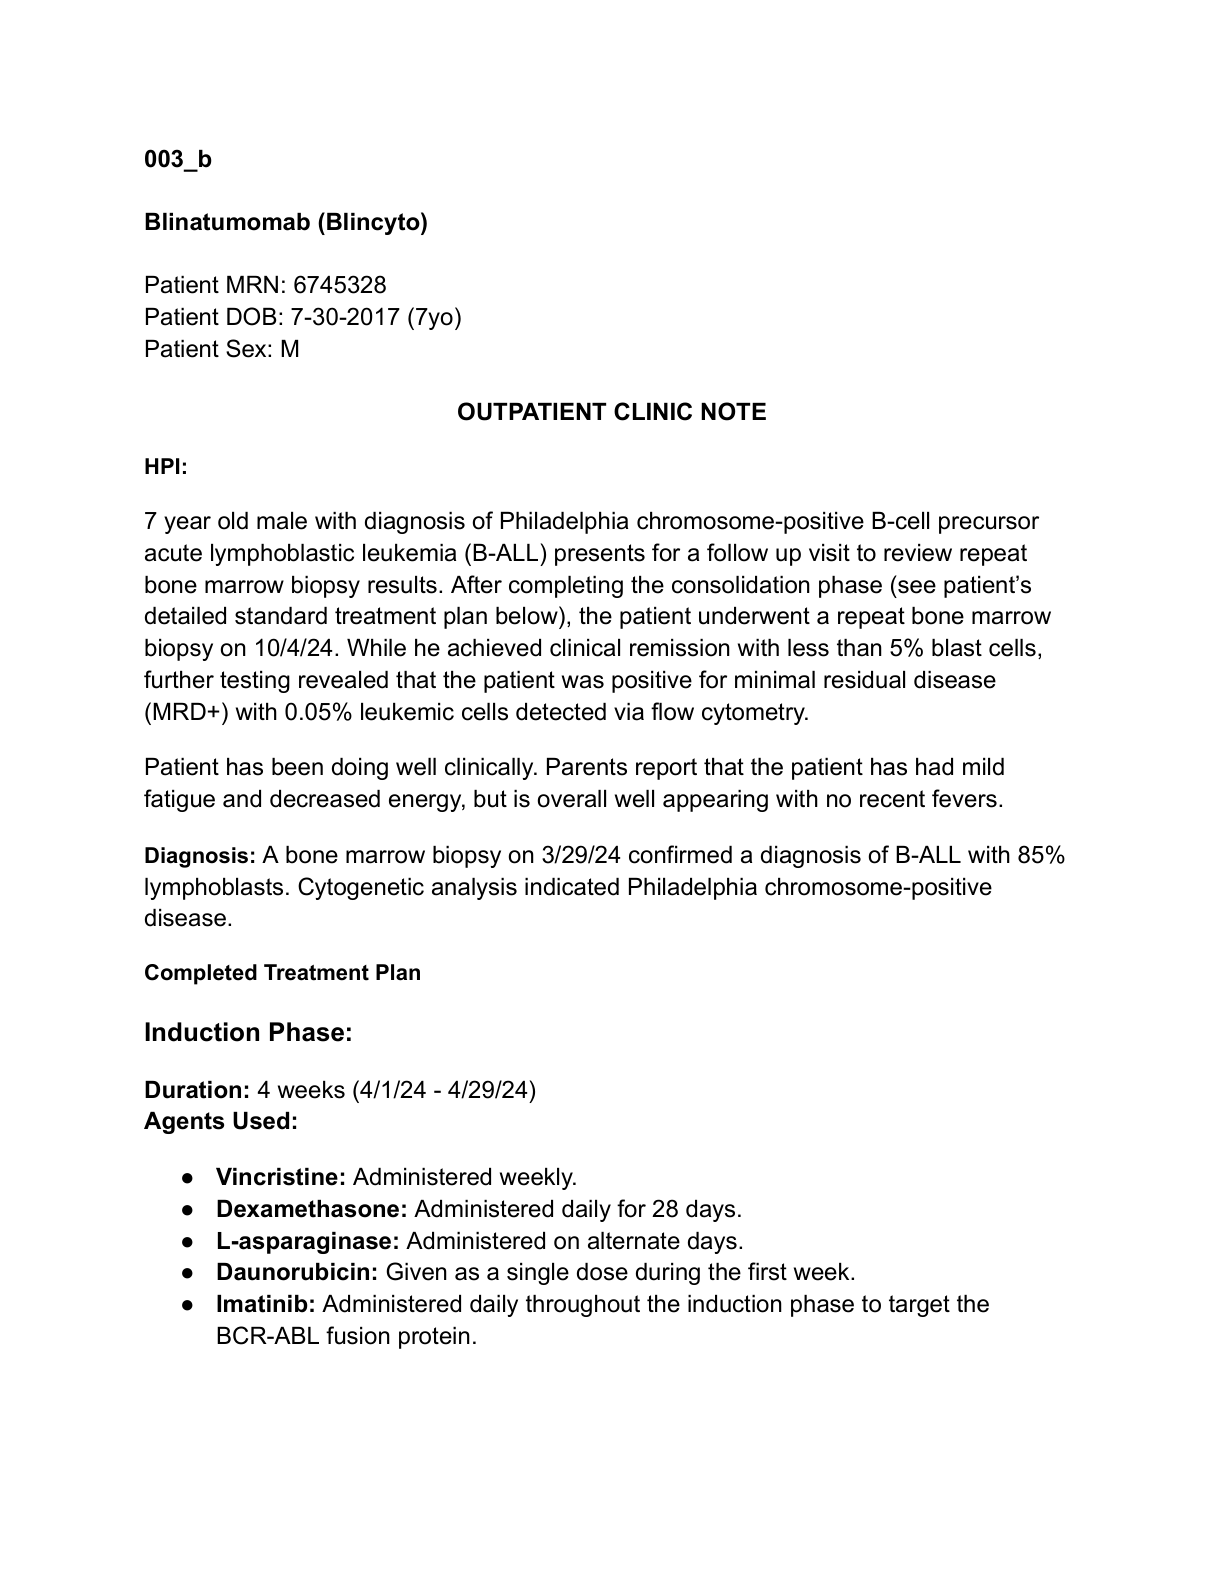
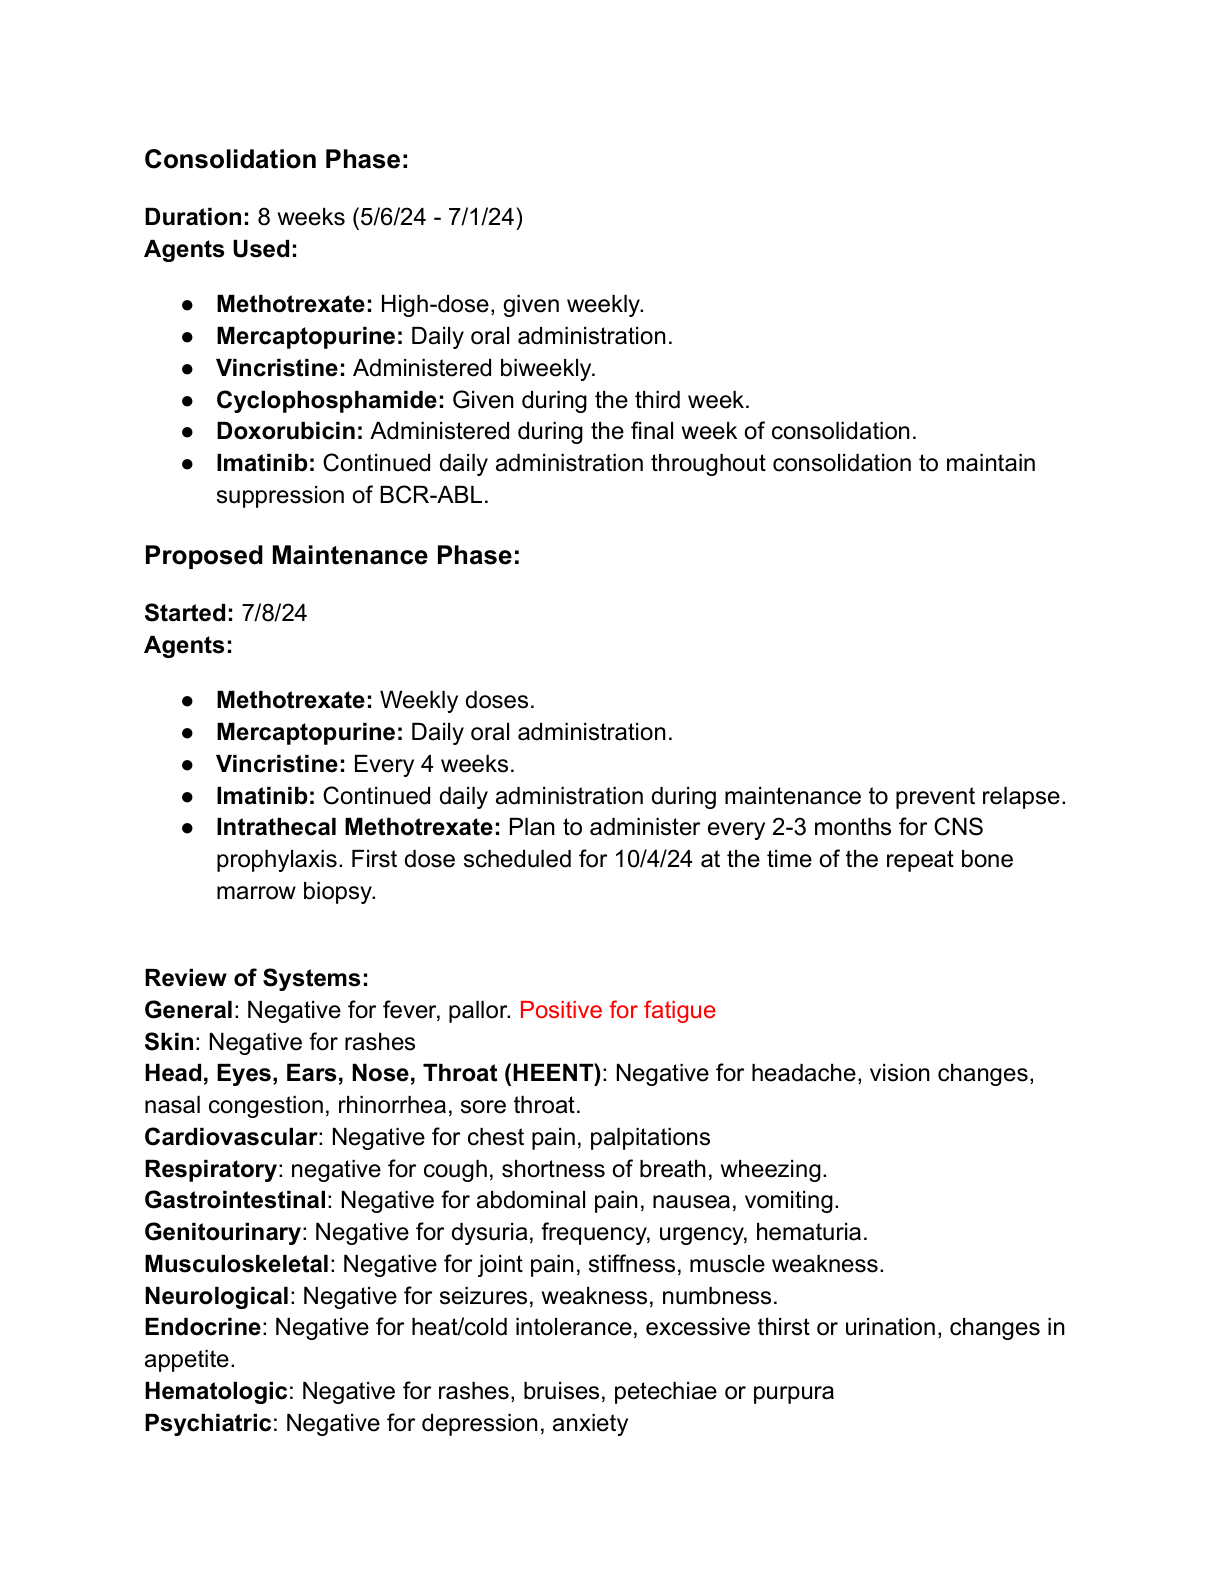
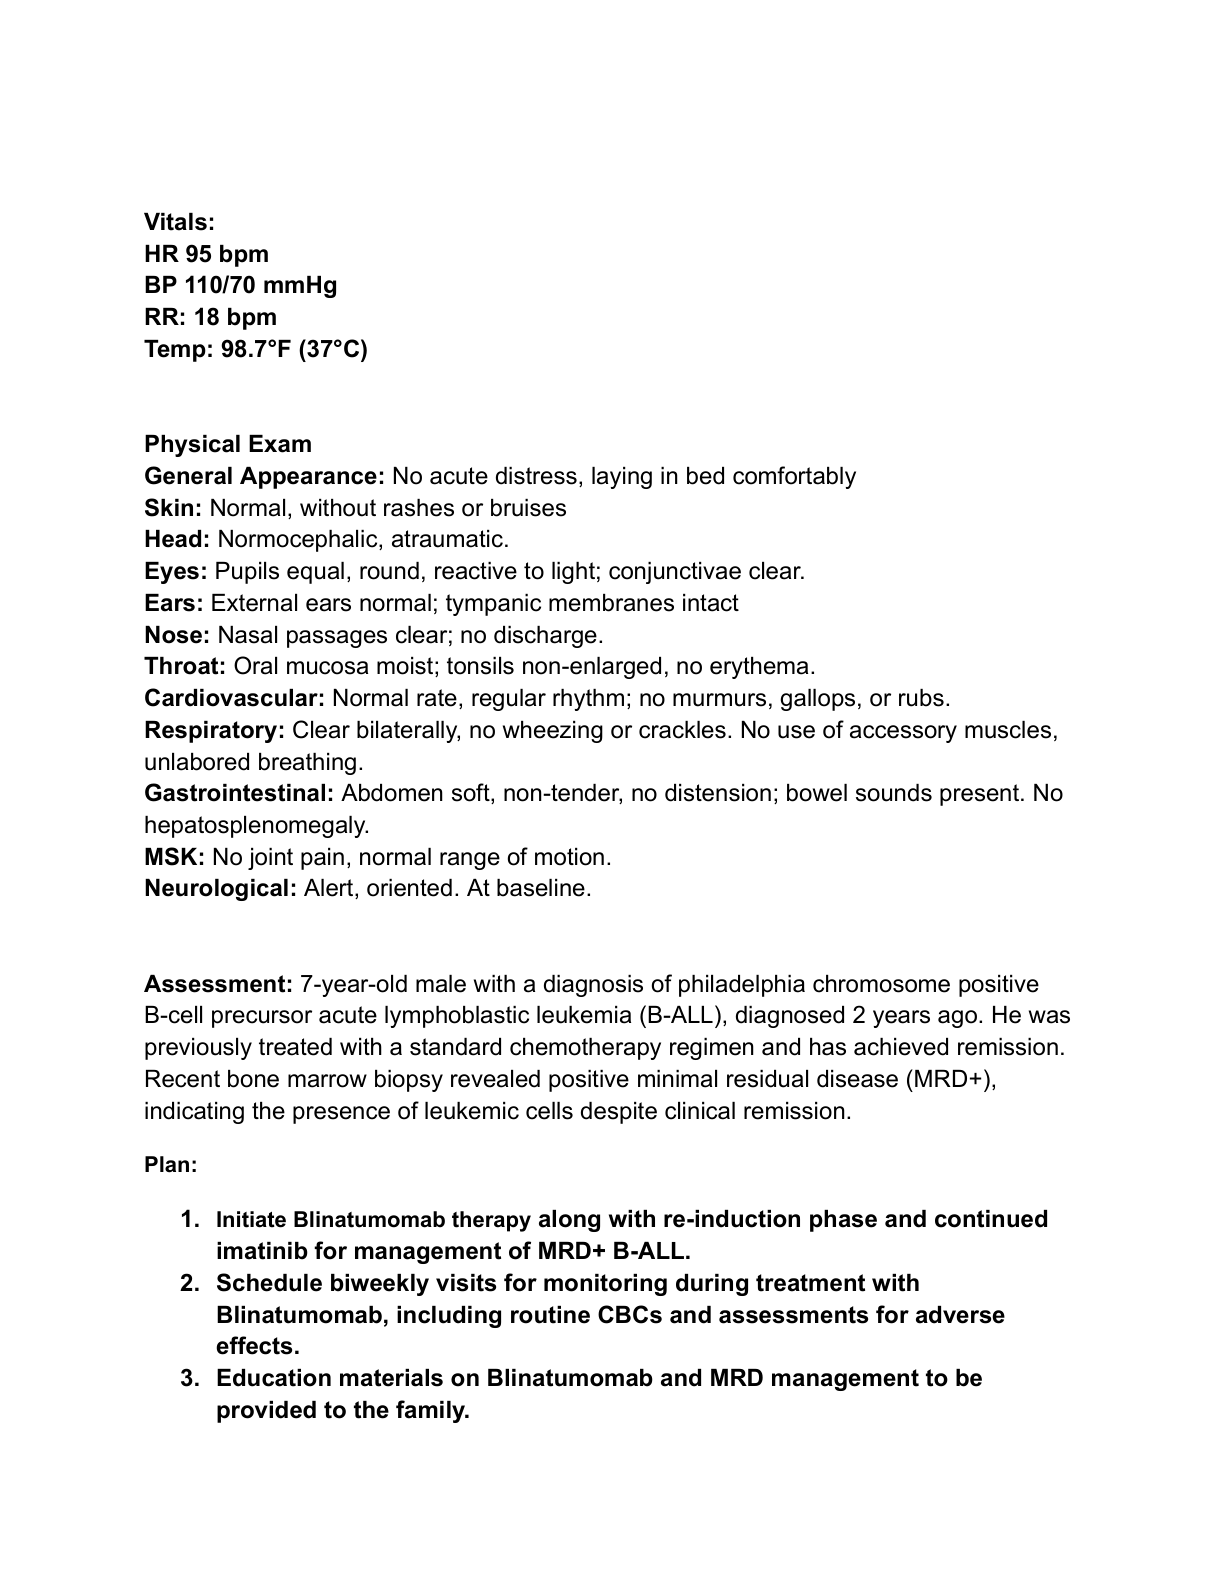

In [7]:
pipeline.conversation_history

In [8]:
pipeline.results

{'6dda1948': {'raw_uploaded_files': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/6dda1948/raw_uploaded_files/003_b (note).pdf',
   'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/6dda1948/raw_uploaded_files/003_b (labs).pdf',
   'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/6dda1948/raw_uploaded_files/003_b (aetna form).pdf'],
  'processed_images': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/6dda1948/processed_images/003_b (aetna form)-page-1.png'],
  'Patient Information': {'Patient Name': 'Lucas Little',
   'Patient Date of Birth': '07/30/2017',
   'Patient ID': '345987',
   'Patient Address': 'Not provided',
   'Patient Phone Number': 'Not provided'},
  'Physician Information': {'Physician Name': 'Dr. Oncoso',
   'Specialty': 'Pediatric Oncology',
   'Physician Contact': {'Office Phone': '555-324-7878',
   

In [9]:
test = {'Clinical Information': {
   'Diagnosis': 'Philadelphia chromosome-positive B-cell precursor acute lymphoblastic leukemia (B-ALL)',
   'ICD-10 code': 'C91.00',
   'Detailed History of Prior Treatments and Results': 'Induction Phase: Vincristine (weekly), Dexamethasone (daily for 28 days), L-asparaginase (alternate days), Daunorubicin (single dose in the first week), Imatinib (daily); Consolidation Phase: Methotrexate (weekly), Mercaptopurine (daily), Vincristine (biweekly), Cyclophosphamide (third week), Doxorubicin (final week), Imatinib (daily); Failed treatments include Imatinib.',
   'Specific drugs already taken by patient and if the patient failed these prior treatments': 'Failed treatments include Imatinib.',
   'How many and which alternative drugs are required by the specific PA form, in order to approve the new requested drug': 'Patient previously failed Tyrosine Kinase Inhibitors (TKIs), specifically Imatinib.',
   'Relevant Lab Results or Diagnostic Imaging': 'Lab Results: WBC 4,500 - 10,000 cells/µL, Neutrophils 40%, Lymphocytes 20%, Monocytes 2%, Eosinophils 1%, Basophils 0%, Hemoglobin 11.5 - 15.5 g/dL, Hematocrit 35% - 45%, Platelet Count 150,000 - 450,000 cells/µL; Pathology Report 10/4/24: Bone Marrow Cellularity: Hypercellular (90%), Blast Cell Percentage: <5%, Positive for minimal residual disease (MRD+); Pathology Report 3/29/24: Bone Marrow Cellularity: Hypercellular (90%), Blast Cell Percentage: 85% lymphoblasts, Philadelphia chromosome-positive (Ph+).',
   'Documented Symptom Severity and Impact on Daily Life': 'Mild fatigue and decreased energy, overall well appearing with no recent fevers.',
   'Prognosis and Risk if Treatment Is Not Approved': 'Presence of minimal residual disease suggests residual leukemic activity, requiring further therapeutic intervention.',
   'Clinical Rationale for Urgency (if applicable)': 'Patient has MRD+ following initial treatment phases, indicating urgency for further treatment to prevent relapse.',
   'Plan for Treatment or Request for Prior Authorization': {'Name of the Medication or Procedure Being Requested': 'Blinatumomab',
    'Code of the Medication or Procedure': 'Not provided',
    'Dosage': '28 mcg/day',
    'Duration': 'Initial approval for 6 months',
    'Rationale': 'Management of MRD+ B-ALL following failure of Imatinib.',
    'Presumed eligibility for the medication based on answers to the PA form questions': 'Patient has MRD+ and failed Imatinib, meeting criteria for Blinatumomab.'}}}

In [10]:
print(pipeline.prompt_manager.create_prompt_pa(test, "lalal"))

## Patient Information:
- **Patient Name**: Not provided
- **Patient Date of Birth**: Not provided
- **Patient ID**: Not provided
- **Patient Address**: Not provided
- **Patient Phone Number**: Not provided

## Physician Information:
- **Physician Name**: Not provided
- **Specialty**: Not provided
- **Physician Contact**:
  - **Office Phone**: Not provided
  - **Fax**: Not provided
  - **Address**: Not provided

## Clinical Information:

- **Diagnosis**: Philadelphia chromosome-positive B-cell precursor acute lymphoblastic leukemia (B-ALL)
- **ICD-10 Code**: C91.00
- **Detailed History of Prior Treatments and Results**: Induction Phase: Vincristine (weekly), Dexamethasone (daily for 28 days), L-asparaginase (alternate days), Daunorubicin (single dose in the first week), Imatinib (daily); Consolidation Phase: Methotrexate (weekly), Mercaptopurine (daily), Vincristine (biweekly), Cyclophosphamide (third week), Doxorubicin (final week), Imatinib (daily); Failed treatments include Imatinib

In [11]:
Notes = '''Patient Jane Smith, age 52, seen on October 31, 2024, for complaints of persistent chest pain that started around three weeks ago. The patient describes a tight, squeezing discomfort in the center of the chest, with occasional pain radiating to her left arm and neck. Symptoms intensify during activity, with minimal relief upon rest. Reports increased shortness of breath, often when climbing stairs, along with fatigue that has worsened significantly over recent months, impacting daily routines. Experiences episodic dizziness without associated nausea, vomiting, or sweating, but states that over-the-counter antacids have not alleviated the symptoms.

Patient has a history of hypertension, diagnosed roughly 10 years ago, currently managed with Metoprolol. Also has type 2 diabetes, diagnosed five years ago, controlled with diet adjustments and Metformin, and hyperlipidemia managed with Atorvastatin. Smoking history includes 15 years at one pack per day, though she quit a decade ago. Family history notable for coronary artery disease—her father suffered a myocardial infarction at age 54.

Current medications: Metoprolol 50 mg daily, Metformin 500 mg twice daily, Atorvastatin 20 mg once daily, and a multivitamin. Denies known drug allergies. Former smoker, no alcohol use. Married, two children, works as an office administrator, leads a mostly sedentary lifestyle, minimal exercise. Review of systems reveals general fatigue and decreased energy, with positive findings for chest pain and shortness of breath; denies palpitations, cough, or wheezing. Reports occasional indigestion with no abdominal pain or change in bowel movements. Dizziness episodes noted, denies headaches or visual disturbances.

On physical exam: Blood pressure recorded at 145/90 mmHg, heart rate 88 bpm, respiratory rate 18 breaths per minute, temperature 98.6°F. General appearance shows some fatigue; cardiovascular exam notes regular rhythm but slightly elevated heart rate with occasional skipped beats per patient report.'''

In [12]:
from openai import AzureOpenAI
import json

In [13]:
from openai import AzureOpenAI
import json

openai_client = AzureOpenAI(
            api_key="DLPecCG1Jpb0hOxeV6wTC9Uu3cD3MVeSPAMROHXKS7yOzKUV5pnNJQQJ99AJAC4f1cMXJ3w3AAABACOGZf70",
            api_version="2024-02-01",
            azure_endpoint="https://aoai-westus-ai-factory.openai.azure.com/",
        )

model = "gpt-4o"
doctor_notes = """
Patient Jane Smith, age 52, seen on October 31, 2024, for complaints of persistent chest pain that started around three weeks ago. The patient describes a tight, squeezing discomfort in the center of the chest, with occasional pain radiating to her left arm and neck. Symptoms intensify during activity, with minimal relief upon rest. Reports increased shortness of breath, often when climbing stairs, along with fatigue that has worsened significantly over recent months, impacting daily routines. Experiences episodic dizziness without associated nausea, vomiting, or sweating, but states that over-the-counter antacids have not alleviated the symptoms.

Patient has a history of hypertension, diagnosed roughly 10 years ago, currently managed with Metoprolol. Also has type 2 diabetes, diagnosed five years ago, controlled with diet adjustments and Metformin, and hyperlipidemia managed with Atorvastatin. Smoking history includes 15 years at one pack per day, though she quit a decade ago. Family history notable for coronary artery disease—her father suffered a myocardial infarction at age 54.

Current medications: Metoprolol 50 mg daily, Metformin 500 mg twice daily, Atorvastatin 20 mg once daily, and a multivitamin. Denies known drug allergies. Former smoker, no alcohol use. Married, two children, works as an office administrator, leads a mostly sedentary lifestyle, minimal exercise. Review of systems reveals general fatigue and decreased energy, with positive findings for chest pain and shortness of breath; denies palpitations, cough, or wheezing. Reports occasional indigestion with no abdominal pain or change in bowel movements. Dizziness episodes noted, denies headaches or visual disturbances.

On physical exam: Blood pressure recorded at 145/90 mmHg, heart rate 88 bpm, respiratory rate 18 breaths per minute, temperature 98.6°F. General appearance shows some fatigue; cardiovascular exam notes regular rhythm but slightly elevated heart rate with occasional skipped beats per patient report.
"""

prompt = f"""
Extract the following information from the notes:
1. Patient's name
2. Age
3. Visit date
4. Chief complaint
5. History of present illness
6. Past medical history
7. Medications
8. Social history
9. Physical examination findings

Output the information in JSON format.
Notes: {doctor_notes}
"""

messages_for_api = [
    {"role": "system", "content": "You are a medical assistant."},
    {"role": "user", "content": prompt}
]

TEMPERATURE = 0.5
MAX_TOKENS = 100
SEED = 0
TOP_P = 1.0

response = openai_client.chat.completions.create(
                model=model,
                messages=messages_for_api,
                temperature=TEMPERATURE,
                max_tokens=MAX_TOKENS,
                seed=SEED,
                top_p=TOP_P,
            )

print(response.choices[0].message.content)

```json
{
  "patient_name": "Jane Smith",
  "age": 52,
  "visit_date": "October 31, 2024",
  "chief_complaint": "Persistent chest pain",
  "history_of_present_illness": "Persistent chest pain that started around three weeks ago. Tight, squeezing discomfort in the center of the chest, with occasional pain radiating to her left arm and neck. Symptoms intensify during activity, with minimal relief upon rest


In [14]:
response.choices[0].message.content

'```json\n{\n  "patient_name": "Jane Smith",\n  "age": 52,\n  "visit_date": "October 31, 2024",\n  "chief_complaint": "Persistent chest pain",\n  "history_of_present_illness": "Persistent chest pain that started around three weeks ago. Tight, squeezing discomfort in the center of the chest, with occasional pain radiating to her left arm and neck. Symptoms intensify during activity, with minimal relief upon rest'

In [15]:
from openai import AzureOpenAI
import json

openai_client = AzureOpenAI(
            api_key="yourkey",
            api_version="2024-02-01",
            azure_endpoint=f"https://{your_location}.openai.azure.com/",
        )

model = "gpt-4o"

doctor_notes = """
Patient Jane Smith, age 52, seen on October 31, 2024, for complaints of persistent chest pain that started around three weeks ago. The patient describes a tight, squeezing discomfort in the center of the chest, with occasional pain radiating to her left arm and neck. Symptoms intensify during activity, with minimal relief upon rest. Reports increased shortness of breath, often when climbing stairs, along with fatigue that has worsened significantly over recent months, impacting daily routines. Experiences episodic dizziness without associated nausea, vomiting, or sweating, but states that over-the-counter antacids have not alleviated the symptoms.

Patient has a history of hypertension, diagnosed roughly 10 years ago, currently managed with Metoprolol. Also has type 2 diabetes, diagnosed five years ago, controlled with diet adjustments and Metformin, and hyperlipidemia managed with Atorvastatin. Smoking history includes 15 years at one pack per day, though she quit a decade ago. Family history notable for coronary artery disease—her father suffered a myocardial infarction at age 54.

Current medications: Metoprolol 50 mg daily, Metformin 500 mg twice daily, Atorvastatin 20 mg once daily, and a multivitamin. Denies known drug allergies. Former smoker, no alcohol use. Married, two children, works as an office administrator, leads a mostly sedentary lifestyle, minimal exercise. Review of systems reveals general fatigue and decreased energy, with positive findings for chest pain and shortness of breath; denies palpitations, cough, or wheezing. Reports occasional indigestion with no abdominal pain or change in bowel movements. Dizziness episodes noted, denies headaches or visual disturbances.

On physical exam: Blood pressure recorded at 145/90 mmHg, heart rate 88 bpm, respiratory rate 18 breaths per minute, temperature 98.6°F. General appearance shows some fatigue; cardiovascular exam notes regular rhythm but slightly elevated heart rate with occasional skipped beats per patient report.
"""


messages_for_api = [
    {"role": "system", "content": "You are a medical assistant."},
    {"role": "user", "content": prompt}
]

TEMPERATURE = 0.5
MAX_TOKENS = 100
SEED = 0
TOP_P = 1.0

response = openai_client.chat.completions.create(
                model=model,
                messages=messages_for_api,
                temperature=TEMPERATURE,
                max_tokens=MAX_TOKENS,
                seed=SEED,
                top_p=TOP_P,
            )

NameError: name 'your_location' is not defined

In [12]:
import openai
import json

openai.api_type = "azure"
openai.api_base = "https://aoai-westus-ai-factory.openai.azure.com/"
openai.api_version = "2024-02-01"
openai.api_key = "DLPecCG1Jpb0hOxeV6wTC9Uu3cD3MVeSPAMROHXKS7yOzKUV5pnNJQQJ99AJAC4f1cMXJ3w3AAABACOGZf70"

doctor_notes = """
Patient Jane Smith, age 52, seen on October 31, 2024, for complaints of persistent chest pain that started around three weeks ago. The patient describes a tight, squeezing discomfort in the center of the chest, with occasional pain radiating to her left arm and neck. Symptoms intensify during activity, with minimal relief upon rest. Reports increased shortness of breath, often when climbing stairs, along with fatigue that has worsened significantly over recent months, impacting daily routines. Experiences episodic dizziness without associated nausea, vomiting, or sweating, but states that over-the-counter antacids have not alleviated the symptoms.

Patient has a history of hypertension, diagnosed roughly 10 years ago, currently managed with Metoprolol. Also has type 2 diabetes, diagnosed five years ago, controlled with diet adjustments and Metformin, and hyperlipidemia managed with Atorvastatin. Smoking history includes 15 years at one pack per day, though she quit a decade ago. Family history notable for coronary artery disease—her father suffered a myocardial infarction at age 54.

Current medications: Metoprolol 50 mg daily, Metformin 500 mg twice daily, Atorvastatin 20 mg once daily, and a multivitamin. Denies known drug allergies. Former smoker, no alcohol use. Married, two children, works as an office administrator, leads a mostly sedentary lifestyle, minimal exercise. Review of systems reveals general fatigue and decreased energy, with positive findings for chest pain and shortness of breath; denies palpitations, cough, or wheezing. Reports occasional indigestion with no abdominal pain or change in bowel movements. Dizziness episodes noted, denies headaches or visual disturbances.

On physical exam: Blood pressure recorded at 145/90 mmHg, heart rate 88 bpm, respiratory rate 18 breaths per minute, temperature 98.6°F. General appearance shows some fatigue; cardiovascular exam notes regular rhythm but slightly elevated heart rate with occasional skipped beats per patient report.
"""

prompt = f"""
Extract the following information from the notes:
1. Patient's name
2. Age
3. Visit date
4. Chief complaint
5. History of present illness
6. Past medical history
7. Medications
8. Social history
9. Physical examination findings

Output the information in JSON format.
Notes: {doctor_notes}
"""

response = openai.
reate(
    engine="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a medical assistant."},
        {"role": "user", "content": prompt}
    ],
    max_tokens=2000,
    temperature=0.5
)

try:
    structured_data = json.loads(response.choices[0].message['content'].strip())
except json.JSONDecodeError:
    print("Failed to parse JSON response.")
    structured_data = response.choices[0].message['content'].strip()

print(json.dumps(structured_data, indent=4))

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [8]:
last_key = next(reversed(pipeline.results.keys()))
last_key

'8b4b8955'

In [9]:
from src.cosmosdb.cosmosmongodb_helper import CosmosDBMongoCoreManager
cosmosdbManager = CosmosDBMongoCoreManager(database_name="pa_proccesing",
                                           collection_name="cases")

In [10]:
query = {"caseId": "efb1ce31"}

# Fetch the document based on the caseId
document = cosmosdbManager.read_document(query)

In [11]:
document['Patient Information']

{'Patient Name': 'Sarah Sample',
 'Patient Date of Birth': '10-19-2014',
 'Patient ID': '4567890',
 'Patient Address': '25 W Randolph St, Chicago, IL 60601',
 'Patient Phone Number': '555-123-4567'}

In [11]:
document

{'_id': ObjectId('672194a55a64bad97e2ae561'),
 'caseId': 'efb1ce31',
 'raw_uploaded_files': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_notes.pdf',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_imaging.pdf',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_labs.pdf',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/raw_uploaded_files/01_a_form.pdf'],
 'processed_images': ['https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/processed_images/01_a_form-page-1.png',
  'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/pa_proccesing_runs/efb1ce31/processed_images/01_a_form-page-2.png'],
 'Patient Information': {'Patient Name': 'Sarah Sample',


In [12]:
document['Clinical Information']
document['policy_location']
document['raw_uploaded_files']
document['policy_location']


'https://storageaeastusfactory.blob.core.windows.net/pre-auth-policies/policies_ocr/001_inflammatory_Conditions.pdf'

In [5]:
from src.documentintelligence.document_intelligence_helper import AzureDocumentIntelligenceManager

doc_intelligence = AzureDocumentIntelligenceManager() 

doc = r"C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\policies\Blinatumomab (Blincyto) 09.01.18.pdf"

results = doc_intelligence.analyze_document(document_input=doc)

In [4]:
print(results.content)

envolve. Pharmacy Solutions
Clinical Policy: Blinatumomab (Blincyto) Reference Number: ERX.SPA.241 Effective Date: 09.01.18 Last Review Date: 08.18
Revision Log
See Important Reminder at the end of this policy for important regulatory and legal information.
Description Blinatumomab (Blincyto®) is a bispecific CD19-directed CD3 T-cell engager that binds to CD19 (expressed on cells of B-lineage origin) and CD3 (expressed on T cells).
FDA Approved Indication(s) Blincyto is indicated for:
• MRD-positive B-cell precursor ALL
o Treatment of B-cell precursor acute lymphoblastic leukemia (ALL) in first or second complete remission with minimal residual disease (MRD) greater than or equal to 0.1% in adults and children. This indication is approved under accelerated approval based on MRD response rate and hematological relapse-free survival. Continued approval for this indication may be contingent upon verification and description of clinical benefit in the confirmatory trials.
· Relapsed or ref